# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import datetime

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/CLV.csv")

In [5]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [6]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,),(10,20,10,),(50,25,5),(10,20,10,30,)], 
    "activation" : ['relu','linear']
}

In [12]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'linear'],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 20, 10),
                                                (50, 25, 5),
                                                (10, 20, 10, 30)]})

In [13]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (50, 25, 5)}


# 3.) Train a model with the optimal solution from GridSearch

In [14]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(50, 25, 5))

In [15]:
regressor = MLPRegressor(hidden_layer_sizes = (50,25,5),activation='relu',solver = 'adam',max_iter=1000) 
regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(50, 25, 5), max_iter=1000)

# 4.) What are the in-sample and out of sample MSEs

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred_in = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

in_mse = mean_squared_error(y_train, y_pred_in)
out_mse = mean_squared_error(y_test, y_pred)

print(in_mse)
print(out_mse)

12351989.325225161
23120303.897857238


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
pip install keras

     |████████████████████████████████| 1.7 MB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

     |████████████████████████████████| 244.3 MB 7.1 MB/s eta 0:00:011    |██████▎                         | 48.0 MB 12.4 MB/s eta 0:00:16     |██████████████▏                 | 107.8 MB 12.9 MB/s eta 0:00:11
     |████████████████████████████████| 1.6 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.5 MB/s eta 0:00:011
     |████████████████████████████████| 25.0 MB 527 kB/s  eta 0:00:01
     |████████████████████████████████| 439 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 16.4 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 34.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [36]:
model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 [==============================] - 1s 2ms/step - loss: 69627312.0000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 45452416.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 45057196.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 44953932.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 44788588.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 44825244.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 44658084.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 44653152.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 44580188.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 44662644.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 44452640.0000
Epoch 12/100
200/200 [=========

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                850       
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 5)                 130       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


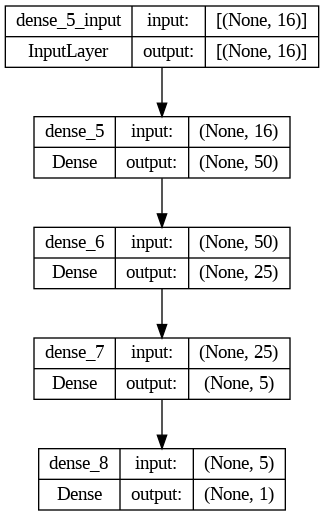

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [39]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from ann_visualizer.visualize import ann_viz

In [41]:
visualize = ann_viz(model, title = "CLV NN Viz", filename= '/content/gdrive/MyDrive/Econ441B/nn_model.gz')